# Ecuaciones Diferenciales Parciales

Aunque muchos fenónemos físicos se pueden modelar solamente utilizando ecuaciones diferenciales ordinarias, hay muchos otros que se deben de extender a ser modelados con **Ecuaciones Diferenciales Parciales**, es decir, ecuaciones diferenciales para funciones de varias variables. Las 4 ecuaciones diferenciales más importantes que surgen mucho en física son

1. Ecuación de Calor 

$$
\frac{\partial u}{\partial t} = D \nabla^2 u
$$

2. Ecuación de Poisson

$$
 \nabla^2 \phi = f(\mathbf{r})
$$

3. Ecuación de Onda

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u
$$

4. Ecuación de Schrödinger independiente del tiempo

$$
- \left(\frac{\hbar}{2m}\nabla^2 + V(\mathbf{r}) \right) \psi = E \psi
$$

Los cursos de Matemáticas Avanzadas muestran como resolver estos problemas de manera analítica. Sin embargo, nosotros lo haremos de manera numérica

## Primer caso: la ecuación de calor en 1D

Para empezar nuestra introducción a las ecuaciones diferenciales parciales, utilizaremos la ecuación de calor en una dimensión para comenzar de manera sencilla. En una dimensión, la ecuación se ve de la siguiente forma

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

Con $D>0$ una constante positiva llamada **constante de difusión**. $u(t,x)$ es entonces una función de dos variables. Por simplicidad, trataremos el caso en el que ambas variables están dentro de un intervalo cerrado de la forma $t \in [0,t_f]$ y $x \in [0,1]$. Si el dominio del tiempo y el espacio es finito, siempre podemos definir que está en un intervalo arbitrario usando adimensionalización.

Para resolver esta ecuación, hay dos clases de condiciones que necesitamos: **condiciones iniciales** y **condiciones de frontera**. Las condiciones iniciales se describen mediante una función puramente espacial que toma la función $u$ en el tiempo $0$, es decir, se expresan de la forma

$$
u(0,x) = g(x)
$$

Las condiciones de frontera, por otro lado, son más complicadas.

## Preludio matemático: condiciones de Frontera

Ya que nuestro dominio espacial no es todo el espacio si no un intervalo cerrado, necesitamos tener información sobre nuestra función en los dos extremos del intervalo $[0,1]$ para obtener una solución única. Las condiciones de frontera pueden darse de distintas maneras, pero las más frecuentes son:

### Condiciones de Dirichlet

En esa clase de condiciones, conocemos los valores que toma la función $u$ en los extremos:

$$
u(t,0) = f_0(t) \quad ,\quad u(t,1) = f_1(t)
$$

### Condiciones de Neumann

En esa clase de condiciones, conocemos los valores que toma la **derivada parcial respecto a la dirección normal de la frontera** (que, en este caso, es la dirección $x$) de la función $u$ en los extremos:

$$
\frac{\partial u}{\partial x}(t,0) = f_0(t) \quad ,\quad \frac{\partial u}{\partial x}(t,1) = f_1(t)
$$

### Condiciones periódicas

En esa clase de condiciones, suponemos que la función toma el mismo valor en ambos extremos de su frontera
$$
u(t,0) =  u(t,1) 
$$

Estas condiciones a la frontera son particularmente importantes por que le dan una nueva interpretación a la geometría de nuestro dominio: en 1D, podemos pensar que nuestro dominio está conectado por un extremo, por lo que eso le da la geometría de un **anillo**

## Preludio computacional: Funciones Anónimas

Muchas veces deberemos darle como argumento a nuestras funciones para resolver ecuaciones diferenciales parciales las funciones correspondientes a las condiciones a la frontera e iniciales. Muchas veces dichas condiciones serán funciones muy parecidas o que dependen de un parámetro, por lo que conviene encontrar formas más compactas de definir funciones.

Sabemos que es posible definir funciones utilizando la sintaxis ya conocida:

```julia
function ejemplo(x)
    return (sin(x))^2 - 4
end
```

Sin embargo, existe una forma abreviada de definir funciones. Podemos usar la siguiente sintaxis:

```julia
ejemplo2(x) = (sin(x))^2 -4
```

In [16]:
function ejemplo(x)
    return (sin(x))^2 - 4
end

ejemplo (generic function with 1 method)

In [17]:
ejemplo2(x) = (sin(x))^2 -4

ejemplo2 (generic function with 1 method)

In [14]:
x = rand()
println(ejemplo(x))
println(ejemplo2(x))
println(ejemplo(x) == ejemplo2(x))

-3.843452780258203
-3.843452780258203
true


Sin embargo, existe todavía una manera más corta de definir funciones. En todos los casos anteriores, las funciones que hemos definido tienen una variable asignada para usarla, son funciones con un  **identificador**. Sin embargo, es posible definir funciones que no tengan una variable identificadora. Esas funciones se llaman **funciones anónimas** y se denotan mediante la siguiente sintaxis

```julia
x -> (sin(x)^2)-4
```


In [19]:
x -> (sin(x)^2) - 4

#7 (generic function with 1 method)

Notemos como no aparece ningún nombre a su lado, y julia simplemente le asigna un nombre `#num`. Sin embargo, nosotros podemos asignarlas a una variable y así tener una función no anónima

In [20]:
ejemplo3 = x -> (sin(x)^2) - 4

#9 (generic function with 1 method)

In [22]:
y = rand()
println(ejemplo3(y))
println((ejemplo(y)==ejemplo3(y)) && (ejemplo2(y)==ejemplo3(y)))

-3.8814222494666453
true


Usar funciones anónimas es particularmente útil si queremos darle una función como argumento a otra función pero no queremos perder tiempo asignándole una variable

In [23]:
# funcion que toma  como argumento otra función y la evalúa en un punto
function evaluarYSumarCuatro(f,x)
    return f(x)+4
end

evaluarYSumarCuatro (generic function with 1 method)

In [26]:
# evalúa la función f(x) = x^2 y le suma 4 en x = 9
# debe regresar 85
println(evaluarYSumarCuatro(x -> x^2,9))
# evalúa la función f(x) = x^3 y le suma 4 en x = 9
# debe regresar 733
println(evaluarYSumarCuatro(x -> x^3,9))

85
733


Las funciones anónimas también nos permiten tomar funciones que tomen varios argumentos y convertirlas en funciones de un solo argumento. 

Por ejemplo, supongamos que queremos hacer la misma **gráfica en una sola figura** (i.e no quiero varias curvas en una sola figura, si no una figura por curva) para una función

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left[ -\frac{1}{2} \left( \frac{x-\mu}{\sigma}\right)^2 \right]}
$$

Con distintos valores de $\mu$, $\sigma$

In [27]:
using Plots

In [31]:
# función que hace las gráfica que quiero de $f$
# f debe de ser una función de una sola variable
function graficar(xs,f)
    ys = [f(x) for x in xs]
    p = plot(xs,ys,label="datos")
    xlabel!("x")
    ylabel!("y")
    title!("La gráfica que quiero")
    # muestra la gráfica
    display(p)
end

graficar (generic function with 1 method)

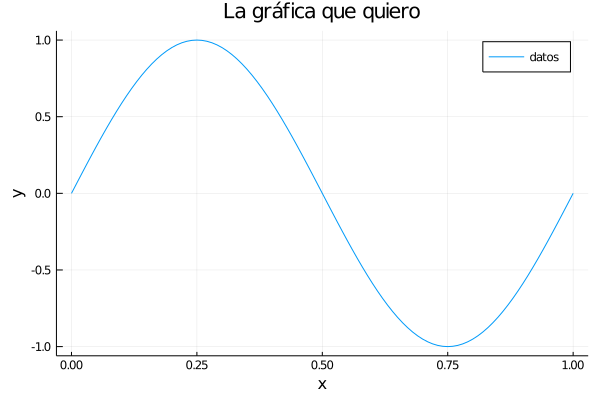

In [29]:
xs = range(0,stop=1,length=101)
graficar(xs,x -> sin(2*pi*x))

In [30]:
function gaussiana(x,mu,sigma)
    a = 1/sqrt(2*pi*sigma^2)
    b = (x-mu)/sigma
    return a*exp(-b^2/2)
end

gaussiana (generic function with 1 method)

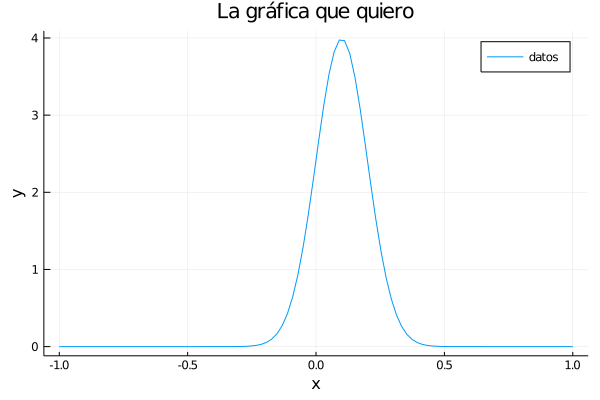

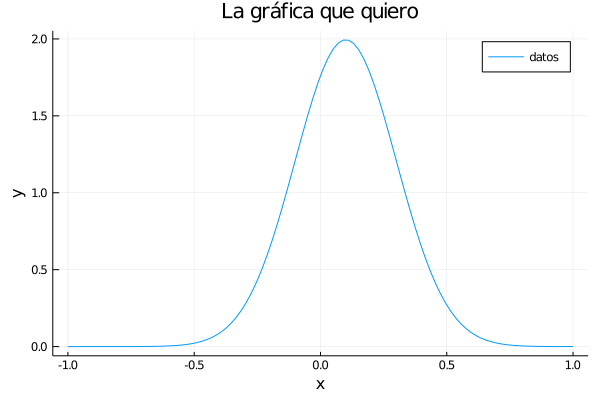

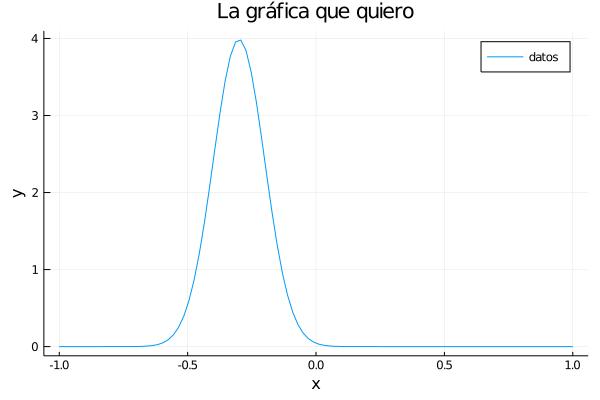

In [32]:
xs = range(-1,stop=1,length=100)
# grafica para mu=0.1, sigma = 0.1
# uso la funcion anónima para que `gaussiana` se vuelva de una sola variable
graficar(xs,x -> gaussiana(x,0.1,0.1))
# grafica para mu=0.1, sigma = 0.2
graficar(xs, x -> gaussiana(x,0.1,0.2))
# grafica para mu=-0.3, sigma = 0.1
graficar(xs,x -> gaussiana(x,-0.3,0.1))

### Ejercicio 1

La función delta de dirac, denotada $\delta(x)$, se puede aproximar como

$$
\delta_\epsilon(x) = \begin{cases}
0 & \text{si } |x|> \epsilon \\
\frac{1}{2\epsilon} & \text{si } |x| \leq \epsilon \\
\end{cases}
$$

Para un $\epsilon>0$ pequeño

Implementa una función `delta(x,epsilon)` que calcule dicha función y realiza distintas gráficas utiliznado la función `graficar` para varios valores de $\epsilon$.

## Diferencias finitas para la ecuación de calor.

Supongamos que discretizamos todo nuestro dominio utilizando un paso de tamaño $h$ para el tiempo y un paso de tamaño $k$ para el espacio. Por simplicdad, supongamos que nuestros pasos dividen exactamente a los dos intervalos de tiempo y espacio y que obtenemos $n$ subintervalos temporales ($n+1$ puntos $[t_0 = 0, t_1,\ldots,t_n]$) y $m$ subintervalos espaciales ($m+1$ puntos $[x_0 = 0, x_1,\ldots,x_m = 1]$)

Utilizando esa discretización, podemos aproximar las derivadas de nuestra ecuación con diferencias finitas: para $t$ una diferencia hacia adelante mientras que para $x$ una diferencia centrada, para obtener:

$$
\frac{u(t+h,x) - u(t,x)}{h} = D \frac{u(t,x+h) + u(t,x-h) - 2u(t,x)}{k^2}
$$

Recordando que nuestra función estará evaluada en tiempos y espacios discretos $(t_k,x_i)$, para simplificar la notación, denotamos:

$$
u(t_k,x_i) = u^{(k)}_i
$$

Nuestra ecuación discretizada se vuelve

$$
\frac{u^{(k+1)}_i - u^{(k)}_i}{h} = D \frac{u^{(k)}_{i+1} + u^{(k)}_{i-1} - 2u^{(k)}_{i}}{k^2}
$$

Podemos despejar $ u^{(k+1)}_i $ para obtener:

$$
u^{(k+1)}_i  = u^{(k)}_i + \frac{Dh}{k^2} \left( u^{(k)}_{i+1} + u^{(k)}_{i-1} - 2u^{(k)}_{i} \right)
$$

Notemos que, si ahora conocemos todos los $u^{(k)}_i$, es posible calcular el valor para el siguiente tiempo. Así, esto nos da una método explícito para ir generando los valores $u^{(1)}_i$, $u^{(2)}_i$ a partir del anterior. La condición incial nos permite conocer $u$ al tiempo $0$ pues $u^{(0)}_i = g(x_i)$

Notemos que para calcular $u^{(k)}_{0}$ y $u^{(k)}_m$ necesitaríamos conocer $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$ los cuales, en principio, **no existen** pues no forman parte de nuestra discretización. Sin embargo, es posible deducir **cuales deberían ser esos estos valores** utilizando las condiciones de frontera. Dependiendo del tipo de condiciones de frontera, $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$ cumplirán distintas expresiones

### Ejercicio 2

Supongamos que tenemos el caso de condiciones de frontera **absorbentes**, descrito por las condiciones de Dirichlet:

$$
u(t,0) = u(t,1) = 0
$$

Expresa analíticamente qué valor deberían de tomar $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$

### Ejercicio 3

Implementa una función `calor1dAbsorbentes(D,t_f,h,k,g)` que resuelva el problema de la ecuación de calor en una dimensión con condición inicial $u(0,x) = g(x)$ y condiciones de frontera absorbentes.

Los argumentos de tu función deben ser una constante de difusión `D`, tiempo final `t_f`, pasos de tiempo y espacial `h`,`k`, respectivamente y `g` una función **escalar** correspondiente a la condición inicial. Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]` y una matriz de $ (n+1)\times (m+1)$  cuyos renglones sean los valores de la función `[u_0^0,...,u_m^0]`, `[u_0^1,...,u_m^1]`,.., `[u_0^n,...,u_m^n]`

**Sugerencia 1**: antes de cualquier cosa, encuentra las expresiones que deben cumplir $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$ en cada tiempo
 

### Ejercicio 4

Utiliza tu función `calor1dAbsorbentes` para resolver el problema anteriormente citado, con condición inicial 

$$g(x) = \delta(x-0.5)$$

Toma valores arbitrarios del los parámetros `D`, `k`, `h` que cumplan que 

$$
\frac{Dh}{k^2} < \frac{1}{2}
$$

Grafica la solucion en los primeros tiempos y después realiza una animación de la solución en todo el intervalo de tiempo. Juega con el valor $h$ y el número de cuadros para que tu animación se pueda ver bien.


**Sugerencia 1**: Toma un valor fijo de `epsilon` y utiliza tu función `delta(x,epsilon)` para dar una función anónima que solo dependa de `x` como argumento a `calor1dAbsorbentes`. Ten cuidado con el valor de epsilon, pues si lo tomas demasiado pequeño tu condición incial será la función $0$.

**Sugerencia 2**: Antes de hacer tu animación, utiliza la función `heatmap`  del paquete Plots para graficar la matriz como un [**mapa de calor**](https://en.wikipedia.org/wiki/Heat_map) de las soluciones en un plano $(t,x)$ y ver como cambian a lo largo del tiempo


### Ejercicio 5

(i) Fija `h`, `k` y resuelve el problema planteado para el ejercicio 4 para distintos valores (no más de 4) de la constante $D$ y compara los resultados en una misma animación. Recuerda tomar `h` y  `k` de suficiente tamaño para que siempre se cumpla la condición 

$$
\frac{Dh}{k^2} < \frac{1}{2}
$$

Para cualquier $D$ que tomes

(ii) repite el inciso (i) pero ahora con valores de $D$ que no cumplan la desigualdad. ¿Cuál es la solución obtenida? ¿Tiene eso algún sentido?

### Ejercicio 6

Al integrar la ecuación de calor en un intervalo, uno puede encontrar que necesariamente se cumple que 

$$
\int_{0}^{1} \frac{u(x,t)}{D} \; dx = Q 
$$

Para $Q$ la energía interna del sistema. Toma alguna la solución obtenida en el ejercicio 4 y utiliza una suma de Riemman (o cualquiera de los métodos vistos en la clase de integración) para calcular $Q$ en los tiempos discretos $t_0,...,t_n$. ¿La energía se conserva? ¿A qué crees que se deba tu respuesta anterior?

### Ejercicio 7

Implementa una función `calor1dPeriodicas(D,t_f,h,k,g)` que resuelva el problema de la ecuación de calor en una dimensión con condición inicial $u(0,x) = g(x)$ y condiciones de frontera periodicas $u(t,0) = u(t,1)$.

Los argumentos de tu función deben ser una constante de difusión `D`, tiempo final `t_f`, pasos de tiempo y espacial `h`,`k`, respectivamente y `g` una función **escalar** correspondiente a la condición inicial. Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]` y una matriz de $(n+1)\times (m+1)$  cuyos renglones sean los valores de la función `[u_0^0,...,u_m^0]`, `[u_0^1,...,u_m^1]`,.., `[u_0^n,...,u_m^n]`

Resuelvelo para valores fijos de `h` y `k` y los $D$ que utilizaste en el inciso i del ejercicio 5. Realiza animaciones de las soluciones.

**Sugerencia 1**: antes de cualquier cosa, encuentra las expresiones que deben cumplir $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$ en cada tiempo.
 

### Ejercicio 8

Repite el ejercicio 6 pero ahora utilizando alguna de las soluciones obtenidas en el ejercicio 7. ¿Cómo evolucionan ahora los valores de $Q$? ¿Existe algún cambio con lo observado en el ejercicio 6? ¿Por qué?

### Ejercicio 9 
Supongamos que ahora tenemos un problema con condiciones de frontera **reflejantes**, es decir, condiciones de Neumann que cumplen con:

$$
\frac{\partial u}{\partial x}(t,0) =  \frac{\partial u}{\partial x}(t,1) = 0
$$

Utiliza una aproximación de diferencias finitas de  $\partial / \partial x$ en los extremos  $u^{(k)}_0$, $u^{(k)}_m$ para encontrar una expresión analítica para $u^{(k)}_{-1}$ y $u^{(k)}_{m+1}$

### Ejercicio 10

Utiliza las expresiones del ejercicio anterior para implementar una función `calor1dReflejantes(D,t_f,h,k,g)` que resuelva el problema de la ecuación de calor en una dimensión con condición inicial $u(0,x) = g(x)$ y condiciones de frontera reflejantes.

Los argumentos de tu función deben ser una constante de difusión `D`, tiempo final `t_f`, pasos de tiempo y espacial `h`,`k`, respectivamente y `g` una función **escalar** correspondiente a la condición inicial. Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]` y una matriz de $n\times m$  cuyos renglones sean los valores de la función `[u_0^0,...,u_m^0]`, `[u_0^1,...,u_m^1]`,.., `[u_0^n,...,u_m^n]`

Resuelvelo para valores fijos de `h` y `k` y los $D$ que utilizaste en el inciso i del ejercicio 5. Realiza animaciones de las soluciones.
 

### Ejercicio 11

Repite el ejercicio 8 para este sistema. ¿Qué observas? Cómparalo con lo obtenido en los otros dos sistemas.